# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
currentDT = datetime.now()

import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initial values for processing
count = 1 
sets  = 1

# Set up lists to hold reponse info
City=[]
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lon = []
Max_temp = [] 
Wind = []

# Create settings dictionary with information we're interested in
settings = {"units": "Imperial", "appid": api_key}

print(f'Beginning Data Retrieval \n---------------------------')
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
        print(f"Processing Record {count} of Set {sets} | {city}" )
        City.append(city)
        Cloudiness.append( current_weather["clouds"]["all"]) 
        Country.append( current_weather["sys"]["country"])        
        Date.append( current_weather["dt"])
        Humidity.append( current_weather["main"]["humidity"])
        Lat.append( current_weather["coord"]["lat"])
        Lon.append( current_weather["coord"]["lon"]) 
        Max_temp.append( current_weather["main"]["temp_max"])
        Wind.append( current_weather["wind"]["speed"])
        count = count+1
    except Exception: 
        print("City not found. Skipping...")
    if count == 51:
        count = 0 
        sets = sets+1

print("-----------------------\nData Retrieval Complete\n-----------------------")

Beginning Data Retrieval 
---------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | codrington
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | salsomaggiore terme
City not found. Skipping...
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | jinchang
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | khatanga
City not found. Skipping...
Processing Record 15 of Set 1 | zaozhuang
Processing Record 16 of Set 1 | ostersund
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | soe
Processing Record 21 of Set 1 | yendi
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Dataframe for storing city data
WeatherPy_df = pd.DataFrame({"City":City,
                             "Cloudiness":Cloudiness,
                             "Country":Country,
                             "Date":Date,
                             "Humidity":Humidity,
                             "Lat":Lat, "Lng":Lon,
                             "Max Temp":Max_temp,
                             "Wind Speed":Wind
                            })
WeatherPy_df.count()
WeatherPy_df.to_csv("WeatherPy_cities.csv", encoding='utf-8', index=False)

City          105
Cloudiness    105
Country       105
Date          105
Humidity      105
Lat           105
Lng           105
Max Temp      105
Wind Speed    105
dtype: int64

In [5]:
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,40,US,1561341946,43,42.65,-73.75,72.00,13.87
1,codrington,90,AU,1561342019,87,-28.95,153.24,57.20,5.82
2,punta arenas,40,CL,1561341973,86,-53.16,-70.91,33.80,4.70
3,salsomaggiore terme,10,IT,1561342558,85,44.81,9.98,71.01,0.85
4,lata,95,IN,1561342558,74,30.78,78.62,45.04,4.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

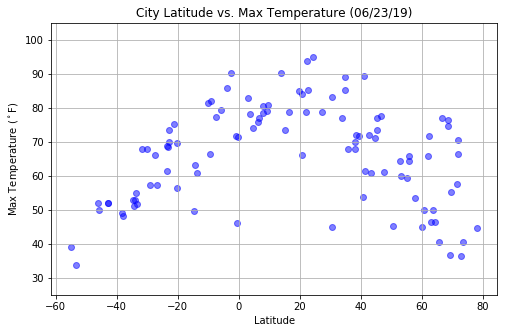

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='b', alpha=0.5)
plt.ylim(25, 105)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ($^\circ$F)")
plt.title("City Latitude vs. Max Temperature ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

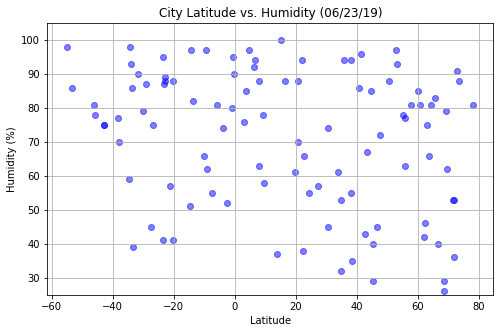

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='b', alpha=0.5)
plt.ylim(25, 105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

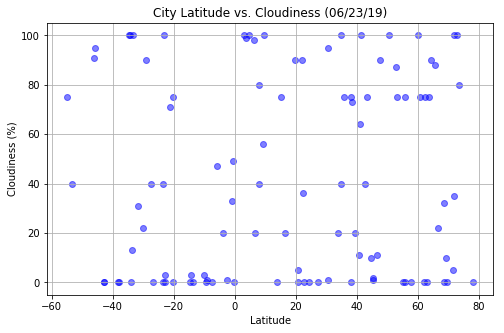

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='b', alpha=0.5)
plt.ylim(-5, 105)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

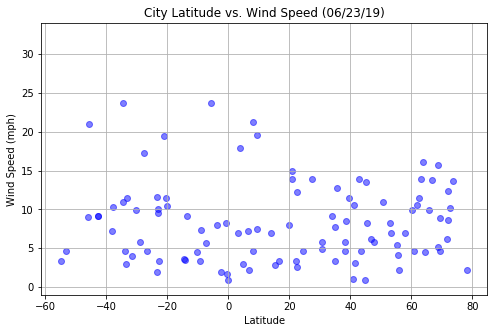

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='b', alpha=0.5)
plt.ylim(-1, 34)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_WindSpeed.png")
plt.show()